In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
model = YOLO("yolov8n.pt")


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 340.6ms
Speed: 14.8ms preprocess, 340.6ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/runs/detect/predict7


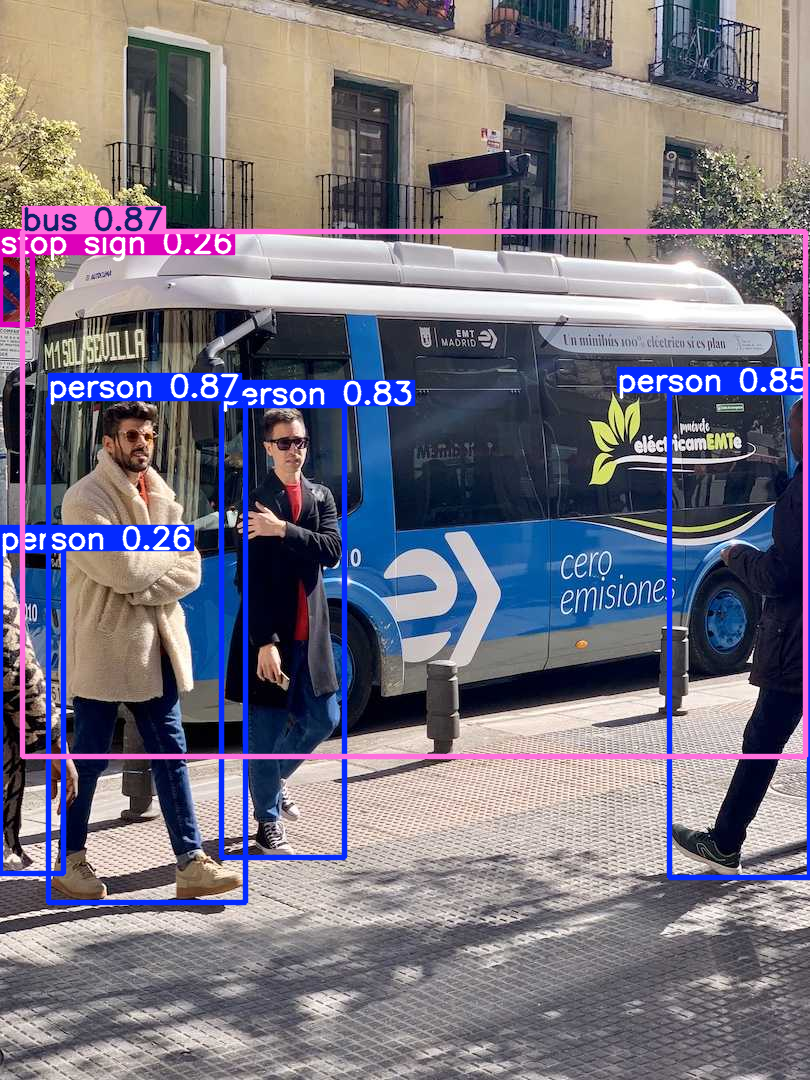

YOLO pre-trained model is working!


In [ ]:
# Run YOLO on a sample image to verify it works
results = model.predict(source="https://ultralytics.com/images/bus.jpg", save=True)
results[0].show()
print("YOLO pre-trained model is working!")

In [ ]:
uploaded = files.upload()
video_path = list(uploaded.keys())[0]
print(f"Uploaded video: {video_path}")

Saving Traffic Light Video.mp4 to Traffic Light Video.mp4
Uploaded video: Traffic Light Video.mp4


In [ ]:
cap = cv2.VideoCapture(video_path)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = int(cap.get(cv2.CAP_PROP_FPS))
out = cv2.VideoWriter("/content/traffic_output.mp4", cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    for r in results:
        boxes = r.boxes.xyxy
        cls_ids = r.boxes.cls
        for i, box in enumerate(boxes):
            x1, y1, x2, y2 = map(int, box)
            cls_id = int(cls_ids[i])
            # YOLO general model class 9 = traffic light (COCO dataset)
            if cls_id == 9:
                crop = frame[y1:y2, x1:x2]
                hsv = cv2.cvtColor(crop, cv2.COLOR_BGR2HSV)

                # Red mask
                lower_red1 = np.array([0,100,100])
                upper_red1 = np.array([10,255,255])
                lower_red2 = np.array([160,100,100])
                upper_red2 = np.array([180,255,255])
                mask_red = cv2.inRange(hsv, lower_red1, upper_red1) + cv2.inRange(hsv, lower_red2, upper_red2)

                # Yellow mask
                lower_yellow = np.array([20,100,100])
                upper_yellow = np.array([30,255,255])
                mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)

                # Green mask
                lower_green = np.array([40,50,50])
                upper_green = np.array([90,255,255])
                mask_green = cv2.inRange(hsv, lower_green, upper_green)

                # Count pixels
                red_count = cv2.countNonZero(mask_red)
                yellow_count = cv2.countNonZero(mask_yellow)
                green_count = cv2.countNonZero(mask_green)

                # Determine state
                if red_count > yellow_count and red_count > green_count:
                    state = "STOP"
                    color = (0,0,255)
                elif yellow_count > red_count and yellow_count > green_count:
                    state = "WAIT"
                    color = (0,255,255)
                elif green_count > red_count and green_count > yellow_count:
                    state = "GO"
                    color = (0,255,0)
                else:
                    state = "UNKNOWN"
                    color = (255,255,255)

                cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
                cv2.putText(frame, state, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    cv2_imshow(frame)
    out.write(frame)

cap.release()
out.release()
print("Traffic light detection complete!")

In [ ]:
output_path = "/content/traffic_output.mp4"
if os.path.exists(output_path):
    print(f"Video found: {output_path}")
    files.download(output_path)
else:
    print("Processed video not found!")

Video found: /content/traffic_output.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
!ffmpeg -i traffic_output.mp4 -vf "fps=10,scale=320:-1:flags=lanczos" demo.gif

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [8]:
from google.colab import files

files.download("demo.gif")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>